# Madrid Train Bombing Network Analytics

FOUR kinds of ties linking the individuals involved:
1.   Trust-friendship (contact, kinship, links in the telephone center).
2.   Ties to Al Qaeda and to Osama Bin Laden.
3.   Co-participation in training camps or wars.
4.   Co-participation in previous terrorist attacks (Sept 11, Casablanca).

These four were added together providing a *“strength of connection”* index
that ranges from 1 to 4. 

### Hint

For instance:
* Flush out the most dangerous terrorists;
  * Explain the concept adopted as “most dangerous”
* Detect the most cohesive groups of terrorists;
  * Detect the most influencial terrorist within each group


- Try also **edge_betweenness**


### Import packages and data


In [1]:
# Networks
import igraph as ig
import louvain

# Computation
import numpy as np
np.random.seed(0)
import scipy
import random
random.seed(0)

# Data
import pandas as pd
import csv

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import sys

import plotly
import plotly.plotly as py

In [2]:
g = ig.Graph.Read_Ncol("data/madrid-edges.dat", names=True)
g["name"] = "g"

names = open("data/madrid-names.dat")
lines = names.read().split('\n')

for i in range(len(lines)):
    lines[i] = lines[i].replace('"', '')
    
for i in range(len(g.vs)):
    g.vs[i]["name"] = lines[int(g.vs[i]["name"])-1]
    
g.vs["label"] = g.vs["name"]
    
print(g)

IGRAPH DNW- 64 486 -- g
+ attr: name (g), label (v), name (v), weight (e)
+ edges (vertex names):
           Jamal Zougam -> Mohamed Bekkali, Mohamed Chaoui, Vinay Kholy,
Suresh Kumar, Mohamed Chedadi, Imad Eddin Barakat, Abdelaziz Benyaich, Abu
Abderrahame, Amer Azizi, Abu Musad Alsakaoui, Mohamed Atta, Ramzi Binalshibh,
Mohamed Belfatmi, Said Bahaji, Galeb Kalaje, Abderrahim Zbakh, Naima Oulad
Akcha, Abdelkarim el Mejjati, Basel Ghayoun, S B Abdelmajid Fakhet, Jamal
Ahmidan, Hamid Ahmidan, Abdeluahid Berrak, Said Berrak, Otman El Gnaut, El
Hemir, OM. Othman Abu Qutada, Shakur, Mohamed El Egipcio
        Mohamed Bekkali -> Jamal Zougam, Mohamed Chaoui
         Mohamed Chaoui -> Jamal Zougam, Mohamed Bekkali, Vinay Kholy, Suresh
Kumar, Imad Eddin Barakat, Abdelaziz Benyaich, Abu Abderrahame, Amer Azizi,
Abu Musad Alsakaoui, Mohamed Atta, Ramzi Binalshibh, Mohamed Belfatmi, Said
Bahaji, Galeb Kalaje, Abderrahim Zbakh, Naima Oulad Akcha, Abdelkarim el
Mejjati, Basel Ghayoun, S B Abdelmaj

### General analysis

In [3]:
n = g.vcount()
m = g.ecount()
print('{0} nodes, {1} edges'.format(n, m))

64 nodes, 486 edges


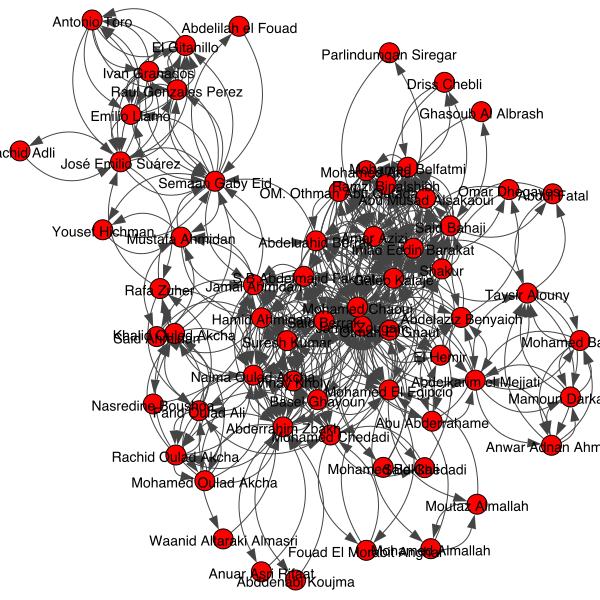

In [4]:
ig.plot(g)

## Centrality Analitycs



In [110]:
def nodes_bound(graph, threshold, measure, name):
    label = graph.vs["label"]
    measure_list = list()
    nodes = list()
    
    directory_name = 'out/' + str(graph["name"]) + '/' + measure + '.npy'
    
    if measure == 'closeness':
        measure_list = graph.closeness(weights=graph.es["weight"])
    elif measure == 'betweenness':
        measure_list =  graph.betweenness(weights=graph.es["weight"], directed=False)
    elif measure == 'pagerank':
        measure_list =  graph.personalized_pagerank(weights=graph.es["weight"], directed=False)
    elif measure == 'degree':
        measure_list =  graph.degree()
    elif measure == 'eigenvector_centrality':
        measure_list = graph.evcent(weights=graph.es["weight"], directed=False)
    else:
        print('Function not available.')
    
    np.save(directory_name, measure_list)
    
    for i in range (len(measure_list)):
        if measure_list[i] >= threshold:
            nodes.append((label[i], round(measure_list[i], 3)))
            
    sorted_nodes = sorted(nodes, key = lambda x: float(x[1]))
    
    plt.hist(measure_list, log=True, rwidth=0.9)
    plt.title(measure + ' histogram')
    plt.suptitle(name, y=1.0, fontsize=12)
    plt.show()
    print('Vertex with the highest ', measure, ':')
    return sorted_nodes

### Shortest path 

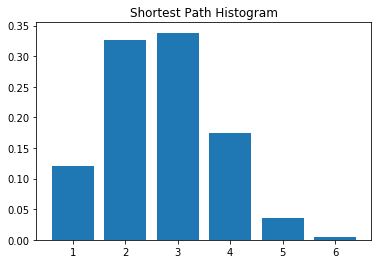

In [111]:
hist = g.path_length_hist(directed=True)

bins = []
values = []

for bin in hist.bins():
    values.append(bin[2])
    bins.append(bin[0])

bins = np.array(bins)
bins = bins.astype(int)
values = np.array(values)

values = values / np.sum(values)

plt.bar(bins, values)
plt.xticks(bins, bins)
plt.title("Shortest Path Histogram")
plt.show()

### Degree centrality

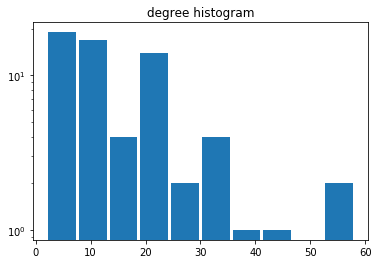

Vertex with the highest  degree :


[('Mohamed Chaoui', 54), ('Jamal Zougam', 58)]

In [112]:
nodes_bound(g, 50, 'degree', '')

### Betweenness centrality

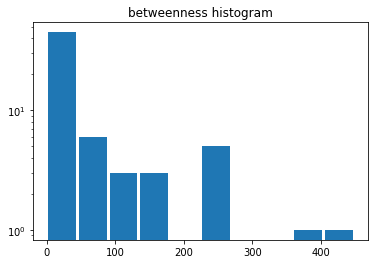

Vertex with the highest  betweenness :


[('Mohamed Chaoui', 373.695), ('Semaan Gaby Eid', 448.459)]

In [113]:
nodes_bound(g, 300, 'betweenness', '')

### Closeness centrality

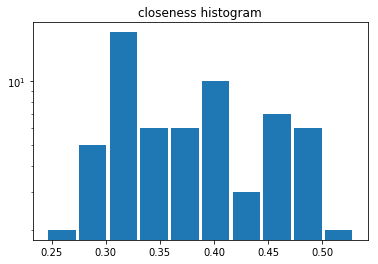

Vertex with the highest  closeness :


[('Vinay Kholy', 0.45),
 ('Suresh Kumar', 0.45),
 ('Imad Eddin Barakat', 0.457),
 ('Hamid Ahmidan', 0.46),
 ('Basel Ghayoun', 0.463),
 ('Abderrahim Zbakh', 0.474),
 ('S B Abdelmajid Fakhet', 0.474),
 ('Naima Oulad Akcha', 0.481),
 ('Abdeluahid Berrak', 0.485),
 ('Said Berrak', 0.485),
 ('Jamal Ahmidan', 0.496),
 ('Jamal Zougam', 0.516),
 ('Mohamed Chaoui', 0.529)]

In [115]:
nodes_bound(g, 0.45, 'closeness', '')

### Pagerank centrality

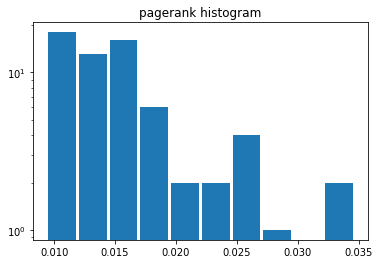

Vertex with the highest  pagerank :


[('Imad Eddin Barakat', 0.033), ('Jamal Zougam', 0.035)]

In [116]:
nodes_bound(g, 0.03, 'pagerank', '')

### Eigenvector centrality

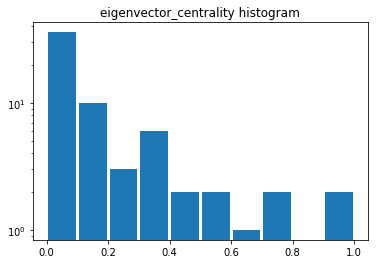

Vertex with the highest  eigenvector_centrality :


[('Imad Eddin Barakat', 0.904), ('Jamal Zougam', 1.0)]

In [117]:
nodes_bound(g, 0.8, 'eigenvector_centrality', '')

## Community Detection

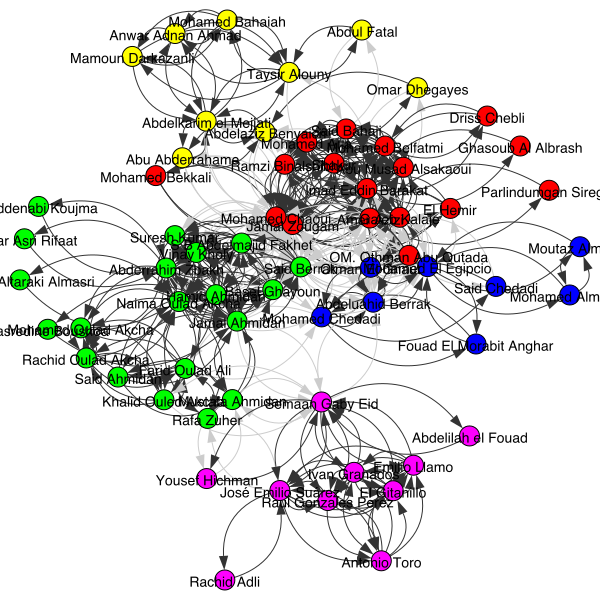

In [25]:
partition = g.community_optimal_modularity(weights=g.es["weight"])
ig.plot(partition)

In [26]:
partition.modularity

0.43768547859765483

In [27]:
partition.summary()

'Clustering with 64 elements and 5 clusters'

In [28]:
partition.sizes()

[17, 20, 8, 9, 10]

In [29]:
community_1 = partition[0]
community_2 = partition[1]
community_3 = partition[2]
community_4 = partition[3]
community_5 = partition[4]

print('\n', 'lunghezza community 1: ', len(community_1), 
      '\n', 'lunghezza community 2: ', len(community_2), 
      '\n', 'lunghezza community 3: ', len(community_3), 
      '\n', 'lunghezza community 4: ', len(community_4), 
      '\n', 'lunghezza community 5: ', len(community_5))


 lunghezza community 1:  17 
 lunghezza community 2:  20 
 lunghezza community 3:  8 
 lunghezza community 4:  9 
 lunghezza community 5:  10


In [30]:
sg1 = g.subgraph(community_1)
sg1["name"] = "sg1"
sg2 = g.subgraph(community_2)
sg2["name"] = "sg2"
sg3 = g.subgraph(community_3)
sg3["name"] = "sg3"
sg4 = g.subgraph(community_4)
sg4["name"] = "sg4"
sg5 = g.subgraph(community_5)
sg5["name"] = "sg5"

vc1 = sg1.vcount()
ec1 = sg1.ecount()

vc2 = sg2.vcount()
ec2 = sg2.ecount()

vc3 = sg3.vcount()
ec3 = sg3.ecount()

vc4 = sg4.vcount()
ec4 = sg4.ecount()

vc5 = sg5.vcount()
ec5 = sg5.ecount()

print('\n', 'Il sottografo 1 ha: {0} nodi, {1} archi.'.format(vc1, ec1), 
      '\n', 'Il sottografo 2 ha: {0} nodi, {1} archi.'.format(vc2, ec2), 
      '\n', 'Il sottografo 3 ha: {0} nodi, {1} archi.'.format(vc3, ec3), 
      '\n', 'Il sottografo 4 ha: {0} nodi, {1} archi.'.format(vc4, ec4), 
      '\n', 'Il sottografo 3 ha: {0} nodi, {1} archi.'.format(vc5, ec5))


 Il sottografo 1 ha: 17 nodi, 138 archi. 
 Il sottografo 2 ha: 20 nodi, 118 archi. 
 Il sottografo 3 ha: 8 nodi, 22 archi. 
 Il sottografo 4 ha: 9 nodi, 30 archi. 
 Il sottografo 3 ha: 10 nodi, 46 archi.


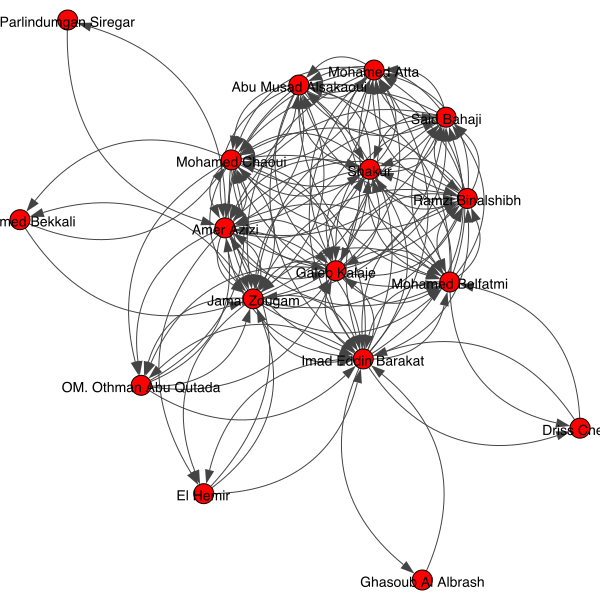

In [31]:
ig.plot(sg1)

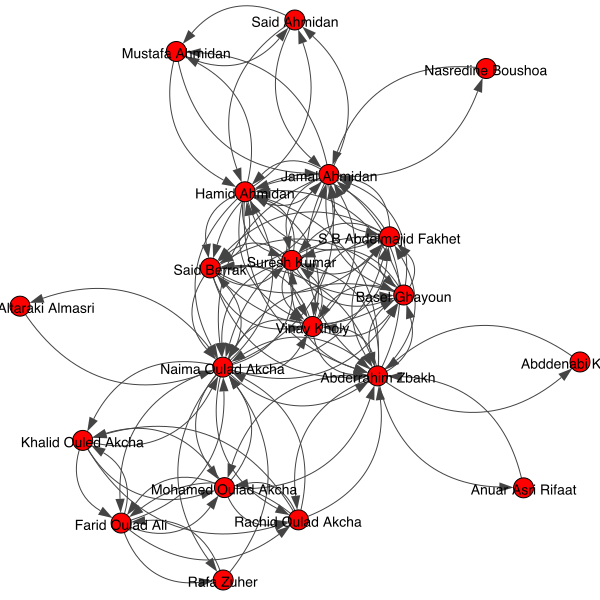

In [32]:
ig.plot(sg2)

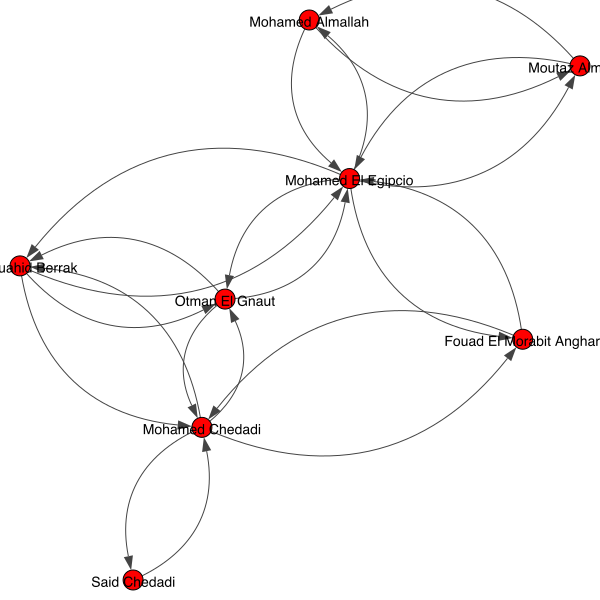

In [33]:
ig.plot(sg3)

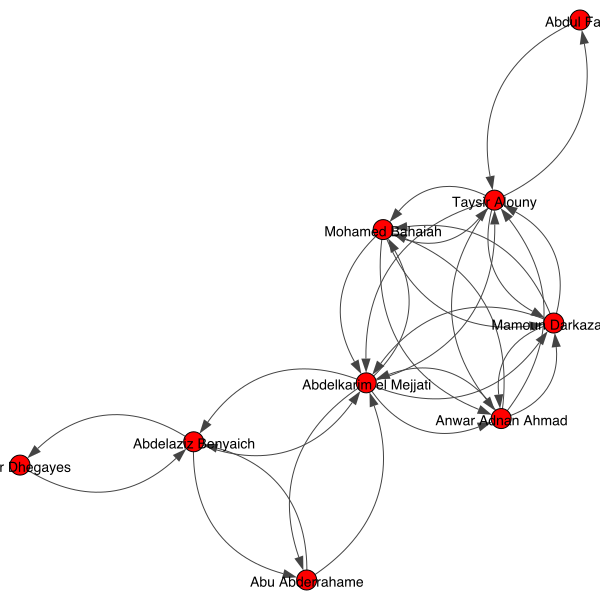

In [34]:
ig.plot(sg4)

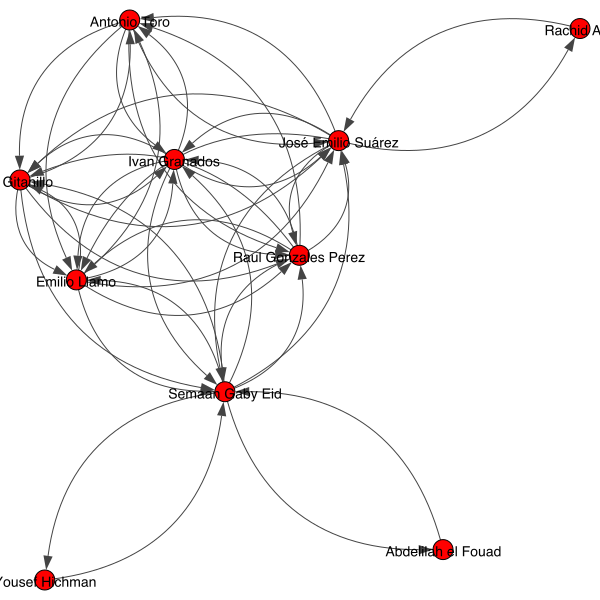

In [35]:
ig.plot(sg5)

## Community 1 - Centrality Analitycs

### Degree centrality

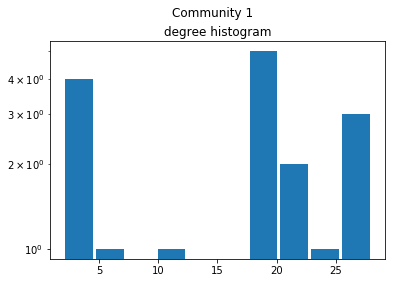

Vertex with the highest  degree :


[('Abu Musad Alsakaoui', 20),
 ('Mohamed Atta', 20),
 ('Ramzi Binalshibh', 20),
 ('Said Bahaji', 20),
 ('Shakur', 20),
 ('Mohamed Belfatmi', 22),
 ('Galeb Kalaje', 22),
 ('Mohamed Chaoui', 24),
 ('Jamal Zougam', 26),
 ('Amer Azizi', 26),
 ('Imad Eddin Barakat', 28)]

In [118]:
nodes_bound(sg1, 15, 'degree', "Community 1")

### Betweenness centrality

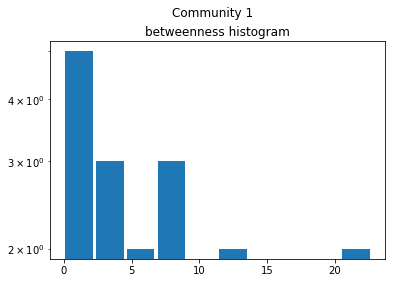

Vertex with the highest  betweenness :


[('Amer Azizi', 21.193), ('Imad Eddin Barakat', 22.67)]

In [120]:
nodes_bound(sg1, 15, 'betweenness', "Community 1")

### Closeness centrality

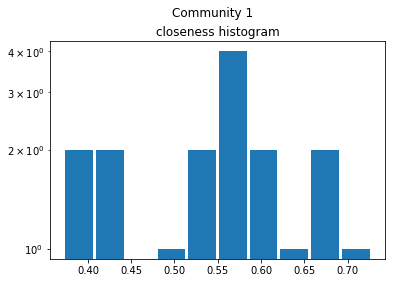

Vertex with the highest  closeness :


[('Mohamed Atta', 0.667), ('Shakur', 0.667), ('Abu Musad Alsakaoui', 0.727)]

In [122]:
nodes_bound(sg1, 0.65, 'closeness', "Community 1")

### Pagerank centrality

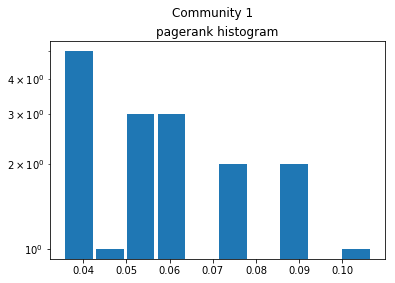

Vertex with the highest  pagerank :


[('Amer Azizi', 0.088), ('Jamal Zougam', 0.089), ('Imad Eddin Barakat', 0.107)]

In [124]:
nodes_bound(sg1, 0.08, 'pagerank', "Community 1")

### Eigenvector centrality

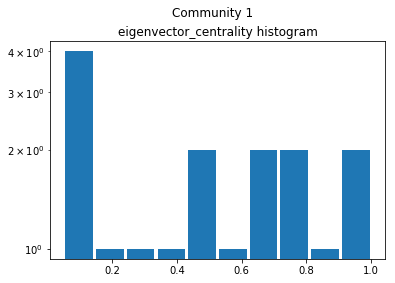

Vertex with the highest  eigenvector_centrality :


[('Amer Azizi', 0.85), ('Jamal Zougam', 0.996), ('Imad Eddin Barakat', 1.0)]

In [125]:
nodes_bound(sg1, 0.8, 'eigenvector_centrality', "Community 1")

## Community 2 - Centrality Analitycs

### Degree centrality

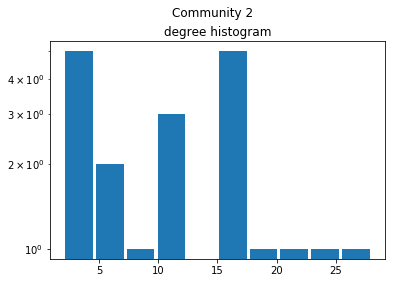

Vertex with the highest  degree :


[('Hamid Ahmidan', 20),
 ('Jamal Ahmidan', 22),
 ('Abderrahim Zbakh', 24),
 ('Naima Oulad Akcha', 28)]

In [128]:
nodes_bound(sg2, 17, 'degree', "Community 2")

### Betweenness centrality

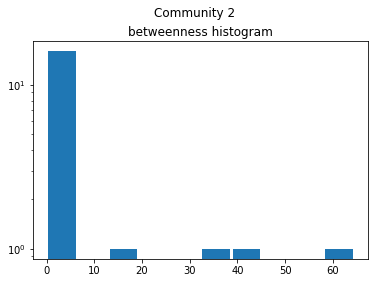

Vertex with the highest  betweenness :


[('Naima Oulad Akcha', 64.5)]

In [130]:
nodes_bound(sg2, 50, 'betweenness', "Community 2")

### Closeness centrality

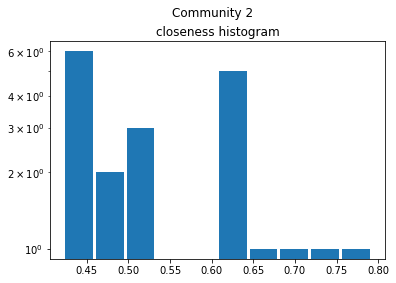

Vertex with the highest  closeness :


[('Hamid Ahmidan', 0.679),
 ('Jamal Ahmidan', 0.704),
 ('Abderrahim Zbakh', 0.731),
 ('Naima Oulad Akcha', 0.792)]

In [132]:
nodes_bound(sg2, 0.65, 'closeness', "Community 2")

### Pagerank centrality

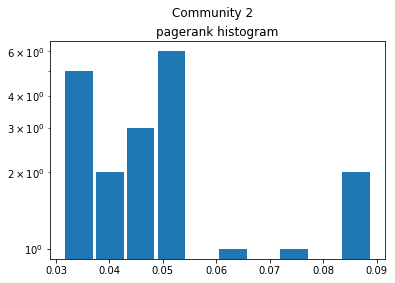

Vertex with the highest  pagerank :


[('Jamal Ahmidan', 0.075),
 ('Abderrahim Zbakh', 0.086),
 ('Naima Oulad Akcha', 0.089)]

In [133]:
nodes_bound(sg2, 0.07, 'pagerank', "Community 2")

### Eigenvector centrality

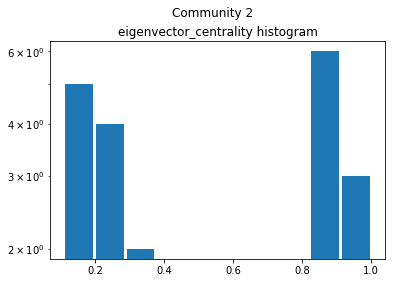

Vertex with the highest  eigenvector_centrality :


[('Vinay Kholy', 0.853),
 ('Suresh Kumar', 0.853),
 ('Basel Ghayoun', 0.853),
 ('S B Abdelmajid Fakhet', 0.853),
 ('Said Berrak', 0.853),
 ('Hamid Ahmidan', 0.906),
 ('Jamal Ahmidan', 0.917),
 ('Abderrahim Zbakh', 0.946),
 ('Naima Oulad Akcha', 1.0)]

In [134]:
nodes_bound(sg2, 0.8, 'eigenvector_centrality', "Community 2")

## Community 3 - Centrality Analitycs

### Degree centrality

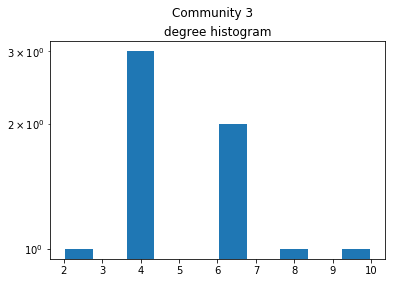

Vertex with the highest  degree :


[('Mohamed Chedadi', 8), ('Mohamed El Egipcio', 10)]

In [135]:
nodes_bound(sg3, 7, 'degree', "Community 3")

### Betweenness centrality

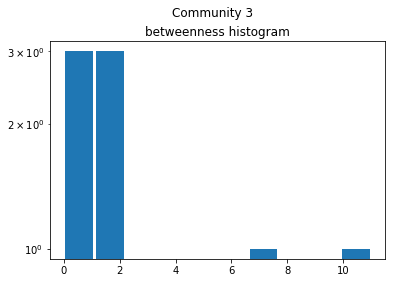

Vertex with the highest  betweenness :


[('Mohamed Chedadi', 7.0), ('Mohamed El Egipcio', 11.0)]

In [136]:
nodes_bound(sg3, 6, 'betweenness', "Community 3")

### Closeness centrality

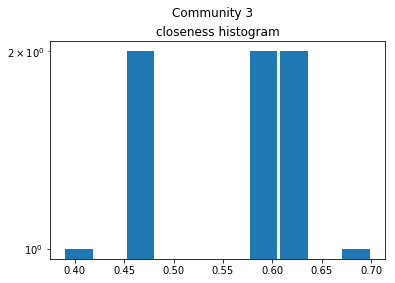

Vertex with the highest  closeness :


[('Mohamed Chedadi', 0.583),
 ('Fouad El Morabit Anghar', 0.583),
 ('Abdeluahid Berrak', 0.636),
 ('Otman El Gnaut', 0.636),
 ('Mohamed El Egipcio', 0.7)]

In [137]:
nodes_bound(sg3, 0.55, 'closeness', "Community 3")

### Pagerank centrality

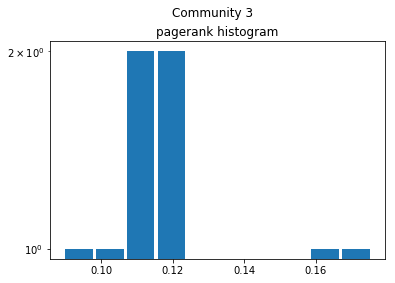

Vertex with the highest  pagerank :


[('Mohamed Chedadi', 0.167), ('Mohamed El Egipcio', 0.175)]

In [139]:
nodes_bound(sg3, 0.15, 'pagerank', "Community 3")

### Eigenvector centrality

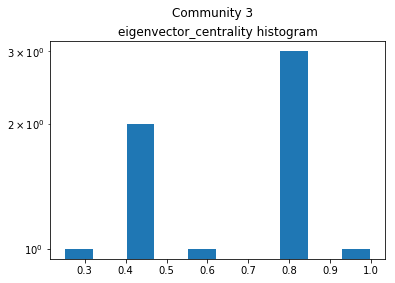

Vertex with the highest  eigenvector_centrality :


[('Mohamed Chedadi', 0.784),
 ('Abdeluahid Berrak', 0.829),
 ('Otman El Gnaut', 0.829),
 ('Mohamed El Egipcio', 1.0)]

In [140]:
nodes_bound(sg3, 0.7, 'eigenvector_centrality', "Community 3")

## Community 4 - Centrality Analitycs

### Degree centrality

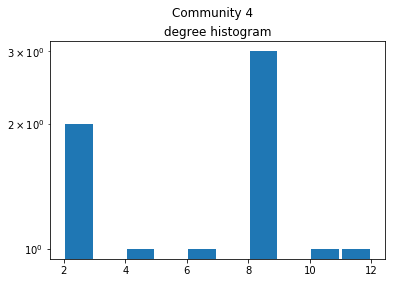

Vertex with the highest  degree :


[('Taysir Alouny', 10), ('Abdelkarim el Mejjati', 12)]

In [141]:
nodes_bound(sg4, 9, 'degree', "Community 4")

### Betweenness centrality

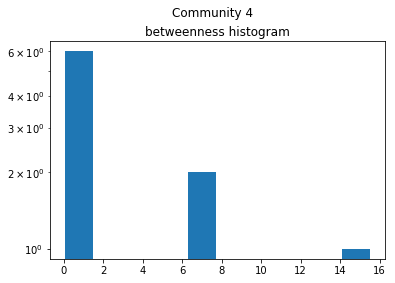

Vertex with the highest  betweenness :


[('Abdelkarim el Mejjati', 15.571)]

In [143]:
nodes_bound(sg4, 12, 'betweenness', "Community 4")

### Closeness centrality

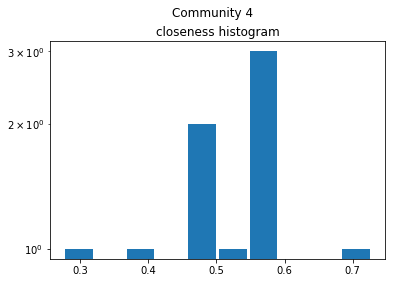

Vertex with the highest  closeness :


[('Abdelkarim el Mejjati', 0.727)]

In [145]:
nodes_bound(sg4, 0.6, 'closeness', "Community 4")

### Pagerank centrality

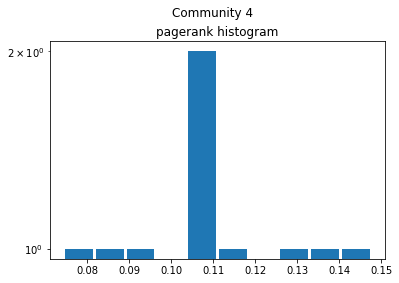

Vertex with the highest  pagerank :


[('Abdelaziz Benyaich', 0.131),
 ('Abdelkarim el Mejjati', 0.139),
 ('Taysir Alouny', 0.148)]

In [147]:
nodes_bound(sg4, 0.12, 'pagerank', "Community 4")

### Eigenvector centrality

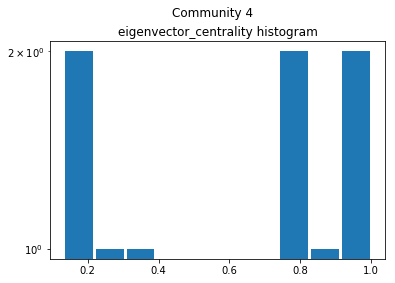

Vertex with the highest  eigenvector_centrality :


[('Anwar Adnan Ahmad', 0.789),
 ('Mamoun Darkazanli', 0.789),
 ('Abdelkarim el Mejjati', 0.89),
 ('Mohamed Bahaiah', 0.967),
 ('Taysir Alouny', 1.0)]

In [149]:
nodes_bound(sg4, 0.6, 'eigenvector_centrality', "Community 4")

## Community 5 - Centrality Analitycs

### Degree centrality

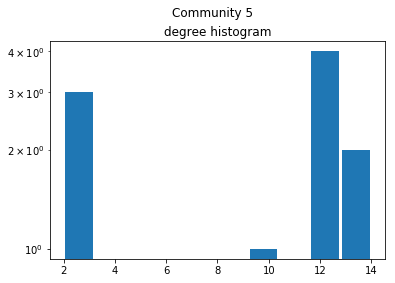

Vertex with the highest  degree :


[('Emilio Llamo', 12),
 ('Ivan Granados', 12),
 ('Raul Gonzales Perez', 12),
 ('El Gitanillo', 12),
 ('José Emilio Suárez', 14),
 ('Semaan Gaby Eid', 14)]

In [150]:
nodes_bound(sg5, 11, 'degree', "Community 5")

### Betweenness centrality

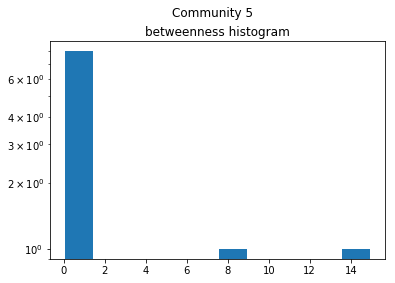

Vertex with the highest  betweenness :


[('José Emilio Suárez', 8.6), ('Semaan Gaby Eid', 15.0)]

In [153]:
nodes_bound(sg5, 6, 'betweenness', "Community 5")

### Closeness centrality

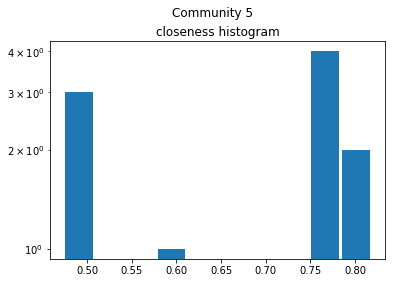

Vertex with the highest  closeness :


[('Emilio Llamo', 0.75),
 ('Ivan Granados', 0.75),
 ('Raul Gonzales Perez', 0.75),
 ('El Gitanillo', 0.75),
 ('José Emilio Suárez', 0.818),
 ('Semaan Gaby Eid', 0.818)]

In [154]:
nodes_bound(sg5, 0.70, 'closeness', "Community 5")

### Pagerank centrality

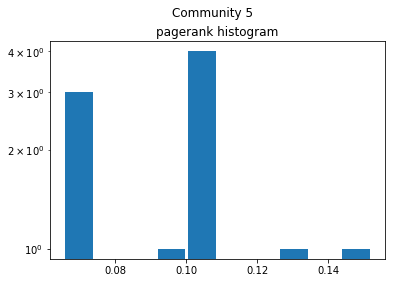

Vertex with the highest  pagerank :


[('José Emilio Suárez', 0.133), ('Semaan Gaby Eid', 0.152)]

In [156]:
nodes_bound(sg5, 0.12, 'pagerank', "Community 5")

### Eigenvector centrality

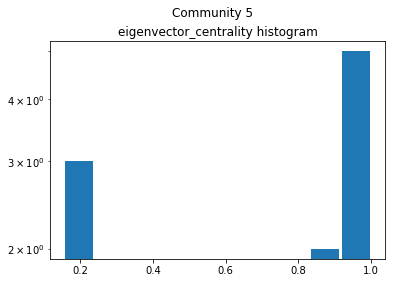

Vertex with the highest  eigenvector_centrality :


[('Antonio Toro', 0.843),
 ('Semaan Gaby Eid', 0.896),
 ('Emilio Llamo', 0.975),
 ('Ivan Granados', 0.975),
 ('Raul Gonzales Perez', 0.975),
 ('El Gitanillo', 0.975),
 ('José Emilio Suárez', 1.0)]

In [157]:
nodes_bound(sg5, 0.8, 'eigenvector_centrality', "Community 5")

## Community Edge Betweenness 

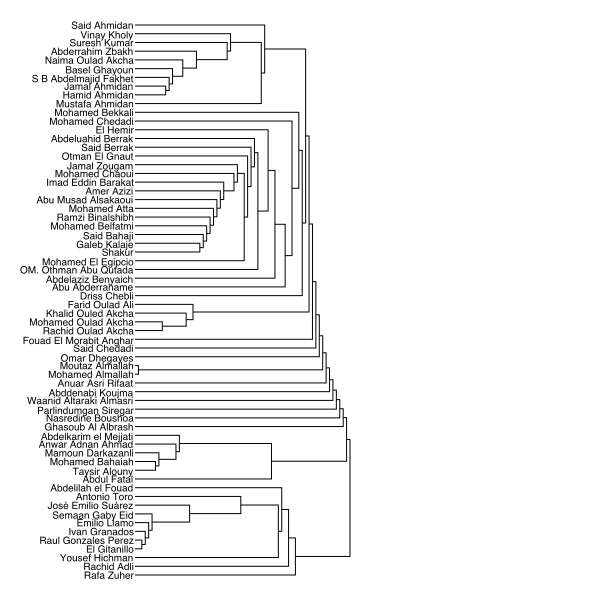

In [158]:
partition_edge = g.community_edge_betweenness(directed=False)
ig.plot(partition_edge)

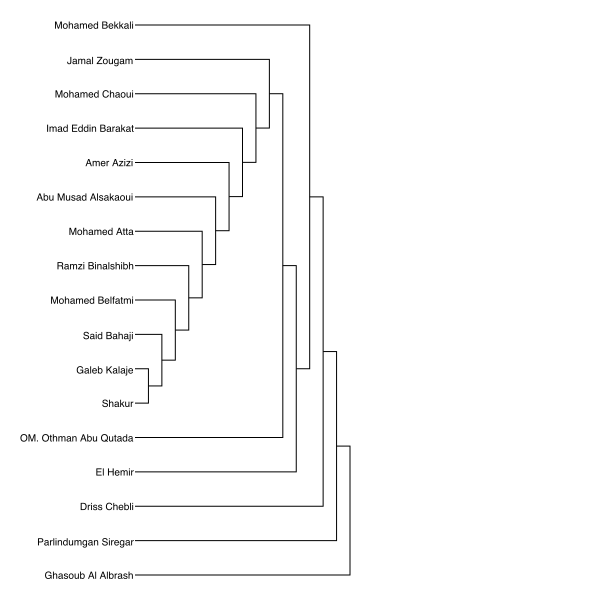

In [159]:
partition_edge_sg1 = sg1.community_edge_betweenness(directed=False)
ig.plot(partition_edge_sg1)

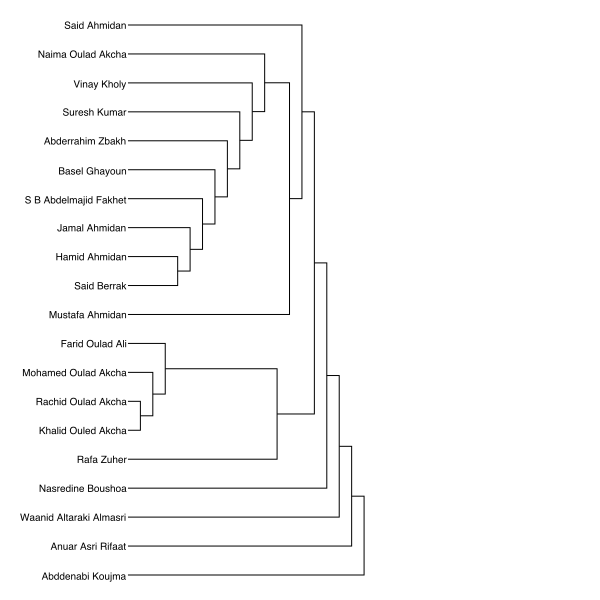

In [160]:
partition_edge_sg2 = sg2.community_edge_betweenness(directed=False)
ig.plot(partition_edge_sg2)


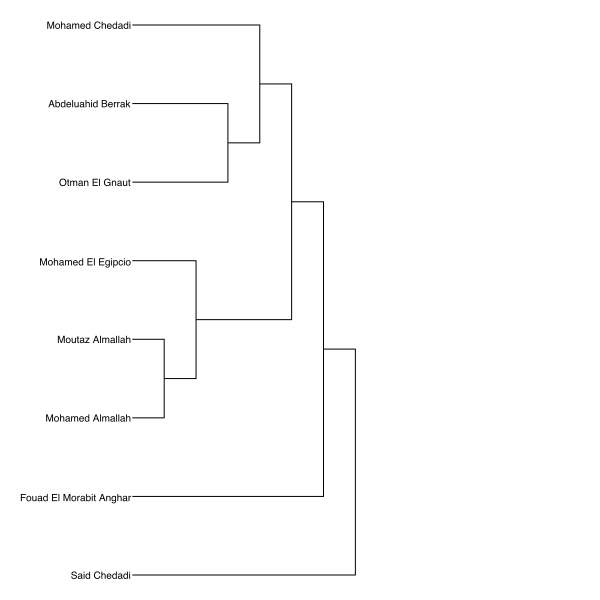

In [161]:
partition_edge_sg3 = sg3.community_edge_betweenness(directed=False)
ig.plot(partition_edge_sg3)

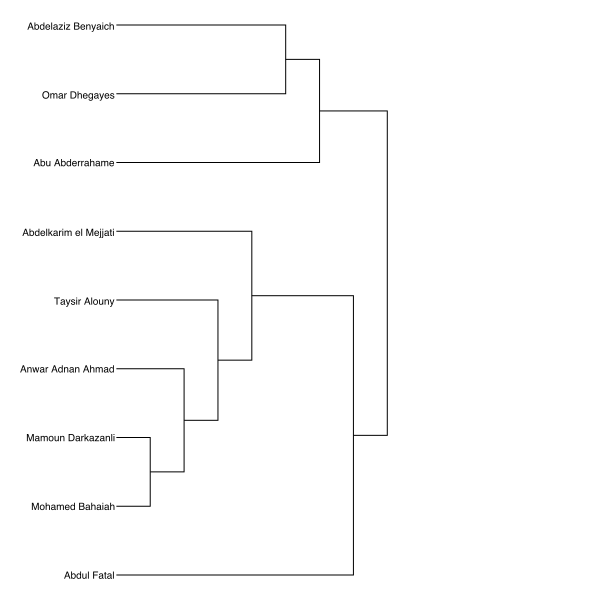

In [162]:
partition_edge_sg4 = sg4.community_edge_betweenness(directed=False)
ig.plot(partition_edge_sg4)

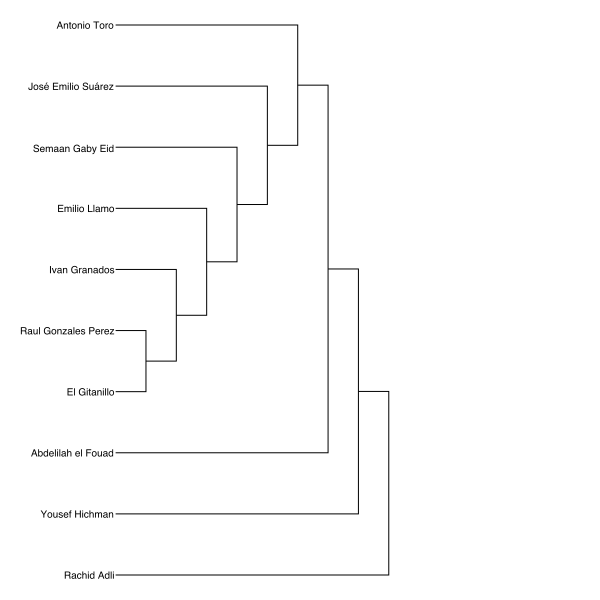

In [163]:
partition_edge_sg5 = sg5.community_edge_betweenness(directed=False)
ig.plot(partition_edge_sg5)

## Comparison of centrality measures

In [185]:
def ranking(graph):
    label = graph.vs['label']
    
    Degree = np.load('out/' + str(graph["name"]) + '/degree.npy')
    Betweenness = np.load('out/' + str(graph["name"]) + '/betweenness.npy')
    Closeness = np.load('out/' + str(graph["name"]) + '/closeness.npy')
    Pagerank = np.load('out/' + str(graph["name"]) + '/pagerank.npy')
    Eigenvector = np.load('out/' + str(graph["name"]) + '/eigenvector_centrality.npy')
    
    ranking_Degree = list()
    ranking_Betweenness = list()
    ranking_Closeness = list()
    ranking_Pagerank = list()
    ranking_Eigenvector = list()
    
    for i in range (len(label)):
        ranking_Degree.append((label[i], Degree[i]))
        ranking_Betweenness.append((label[i], Betweenness[i]))
        ranking_Closeness.append((label[i], Closeness[i]))
        ranking_Pagerank.append((label[i], Pagerank[i]))
        ranking_Eigenvector.append((label[i], Eigenvector[i]))
        
    ranking_Degree = sorted(ranking_Degree, key = lambda x: float(x[1]), reverse=True)
    ranking_Betweenness = sorted(ranking_Betweenness, key = lambda x: float(x[1]), reverse=True)
    ranking_Closeness = sorted(ranking_Closeness, key = lambda x: float(x[1]), reverse=True)
    ranking_Pagerank = sorted(ranking_Pagerank, key = lambda x: float(x[1]), reverse=True)
    ranking_Eigenvector = sorted(ranking_Eigenvector, key = lambda x: float(x[1]), reverse=True)
    
    return ranking_Degree[:5], ranking_Betweenness[:5], ranking_Closeness[:5], ranking_Pagerank[:5], ranking_Eigenvector[:5]
    

def print_comparison_table (graph):
    ranking_Degree, ranking_Betweenness, ranking_Closeness, ranking_Pagerank, ranking_Eigenvector = ranking(graph)
    
    print('Centrality measure of: ', str(graph["name"]))
    print('\n')
    print('Degree'.ljust(20) + 'Betweenness'.ljust(20) + 'Closeness'.ljust(20) + 'Pagerank'.ljust(20) + 'Eigenvector')
    print('\n')
    print(ranking_Degree[0][0].ljust(20) + ranking_Betweenness[0][0].ljust(20) + ranking_Closeness[0][0].ljust(20) + ranking_Pagerank[0][0].ljust(20) + ranking_Eigenvector[0][0])
    print(ranking_Degree[1][0].ljust(20) + ranking_Betweenness[1][0].ljust(20) + ranking_Closeness[1][0].ljust(20) + ranking_Pagerank[1][0].ljust(20) + ranking_Eigenvector[1][0])
    print(ranking_Degree[2][0].ljust(20) + ranking_Betweenness[2][0].ljust(20) + ranking_Closeness[2][0].ljust(20) + ranking_Pagerank[2][0].ljust(20) + ranking_Eigenvector[2][0])
    print(ranking_Degree[3][0].ljust(20) + ranking_Betweenness[3][0].ljust(20) + ranking_Closeness[3][0].ljust(20) + ranking_Pagerank[3][0].ljust(20) + ranking_Eigenvector[3][0])
    print(ranking_Degree[4][0].ljust(20) + ranking_Betweenness[4][0].ljust(20) + ranking_Closeness[4][0].ljust(20) + ranking_Pagerank[4][0].ljust(20) + ranking_Eigenvector[4][0])
    
    

In [186]:
print_comparison_table(g)

Centrality measure of:  g


Degree              Betweenness         Closeness           Pagerank            Eigenvector


Jamal Zougam        Semaan Gaby Eid     Mohamed Chaoui      Jamal Zougam        Jamal Zougam
Mohamed Chaoui      Mohamed Chaoui      Jamal Zougam        Imad Eddin Barakat  Imad Eddin Barakat
Imad Eddin Barakat  Abdeluahid Berrak   Jamal Ahmidan       Mohamed Chaoui      Mohamed Chaoui
Amer Azizi          Jamal Zougam        Abdeluahid Berrak   Abderrahim Zbakh    Amer Azizi
Said Berrak         Jamal Ahmidan       Said Berrak         Amer Azizi          Galeb Kalaje


In [187]:
print_comparison_table(sg1)

Centrality measure of:  sg1


Degree              Betweenness         Closeness           Pagerank            Eigenvector


Imad Eddin Barakat  Imad Eddin Barakat  Abu Musad Alsakaoui Imad Eddin Barakat  Imad Eddin Barakat
Jamal Zougam        Amer Azizi          Mohamed Atta        Jamal Zougam        Jamal Zougam
Amer Azizi          Abu Musad Alsakaoui Shakur              Amer Azizi          Amer Azizi
Mohamed Chaoui      Mohamed Chaoui      Ramzi Binalshibh    Mohamed Belfatmi    Mohamed Belfatmi
Mohamed Belfatmi    Jamal Zougam        Mohamed Chaoui      Mohamed Chaoui      Mohamed Chaoui


In [188]:
print_comparison_table(sg2)

Centrality measure of:  sg2


Degree              Betweenness         Closeness           Pagerank            Eigenvector


Naima Oulad Akcha   Naima Oulad Akcha   Naima Oulad Akcha   Naima Oulad Akcha   Naima Oulad Akcha
Abderrahim Zbakh    Abderrahim Zbakh    Abderrahim Zbakh    Abderrahim Zbakh    Abderrahim Zbakh
Jamal Ahmidan       Jamal Ahmidan       Jamal Ahmidan       Jamal Ahmidan       Jamal Ahmidan
Hamid Ahmidan       Hamid Ahmidan       Hamid Ahmidan       Hamid Ahmidan       Hamid Ahmidan
Vinay Kholy         Mohamed Oulad Akcha Vinay Kholy         Farid Oulad Ali     Said Berrak


In [189]:
print_comparison_table(sg3)

Centrality measure of:  sg3


Degree              Betweenness         Closeness           Pagerank            Eigenvector


Mohamed El Egipcio  Mohamed El Egipcio  Mohamed El Egipcio  Mohamed El Egipcio  Mohamed El Egipcio
Mohamed Chedadi     Mohamed Chedadi     Abdeluahid Berrak   Mohamed Chedadi     Abdeluahid Berrak
Abdeluahid Berrak   Abdeluahid Berrak   Otman El Gnaut      Abdeluahid Berrak   Otman El Gnaut
Otman El Gnaut      Otman El Gnaut      Mohamed Chedadi     Otman El Gnaut      Mohamed Chedadi
Fouad El Morabit AngharFouad El Morabit AngharFouad El Morabit AngharMohamed Almallah    Fouad El Morabit Anghar


In [190]:
print_comparison_table(sg4)

Centrality measure of:  sg4


Degree              Betweenness         Closeness           Pagerank            Eigenvector


Abdelkarim el MejjatiAbdelkarim el MejjatiAbdelkarim el MejjatiTaysir Alouny       Taysir Alouny
Taysir Alouny       Abdelaziz Benyaich  Taysir Alouny       Abdelkarim el MejjatiMohamed Bahaiah
Anwar Adnan Ahmad   Taysir Alouny       Anwar Adnan Ahmad   Abdelaziz Benyaich  Abdelkarim el Mejjati
Mamoun Darkazanli   Anwar Adnan Ahmad   Mamoun Darkazanli   Mohamed Bahaiah     Mamoun Darkazanli
Mohamed Bahaiah     Mamoun Darkazanli   Abdelaziz Benyaich  Anwar Adnan Ahmad   Anwar Adnan Ahmad


In [191]:
print_comparison_table(sg5)

Centrality measure of:  sg5


Degree              Betweenness         Closeness           Pagerank            Eigenvector


José Emilio Suárez  Semaan Gaby Eid     José Emilio Suárez  Semaan Gaby Eid     José Emilio Suárez
Semaan Gaby Eid     José Emilio Suárez  Semaan Gaby Eid     José Emilio Suárez  Emilio Llamo
Emilio Llamo        Emilio Llamo        Emilio Llamo        Ivan Granados       Raul Gonzales Perez
Ivan Granados       Ivan Granados       Ivan Granados       Raul Gonzales Perez Ivan Granados
Raul Gonzales Perez Raul Gonzales Perez Raul Gonzales Perez El Gitanillo        El Gitanillo
